In [1]:
 import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import mpl_scatter_density

In [2]:
IFT = uproot.open("../../FASER-Track-Matching/IFT/trackerspfit.root")

In [3]:
x = np.array(IFT["spfit"]["sp_track_x"])
y = np.array(IFT["spfit"]["sp_track_y"])
z = np.array(IFT["spfit"]["sp_track_z"])

In [8]:
x_space_points = x[len(x[:])!=0]
y_space_points = y[len(y[:])!=0]
z_space_points = z[len(z[:])!=0]

In [93]:
x_space_points

array([[array([], dtype=float64), array([], dtype=float64),
        array([], dtype=float64), ...,
        array([100.00253296, 102.00267029, 100.00253296]),
        array([-92.0019989 , -90.0018692 , -88.00173187]),
        array([-75.00086975, -75.00086975, -76.00093079])]], dtype=object)

In [9]:
x_FIRST = []

for i in range(0,len(x_space_points[0])):
    if len(x_space_points[:,i][0]) == 3:
        x_FIRST.append(x_space_points[:,i][0][0])
    

In [67]:
num_SP = []
for i in range(0,len(x_space_points[0])):
    num_SP.append(len(x_space_points[:,i][0]))
    

In [70]:
x_space_points

array([[array([], dtype=float64), array([], dtype=float64),
        array([], dtype=float64), ...,
        array([100.00253296, 102.00267029, 100.00253296]),
        array([-92.0019989 , -90.0018692 , -88.00173187]),
        array([-75.00086975, -75.00086975, -76.00093079])]], dtype=object)

In [69]:
np.unique(num_SP)

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  66,  72,  75,  84,  87,
        93,  96,  99, 105, 123, 129, 135, 150, 192, 216, 270])

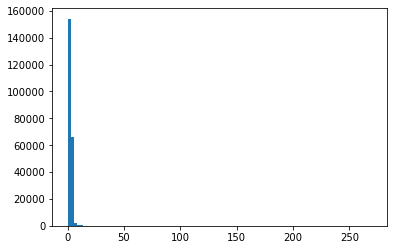

In [72]:
plt.hist(num_SP,bins=100)
plt.show()

In [17]:
y_FIRST = []

for i in range(0,len(y_space_points[0])):
    if len(y_space_points[:,i][0]) == 3:
        y_FIRST.append(y_space_points[:,i][0][0])
    

In [18]:
z_FIRST = []

for i in range(0,len(z_space_points[0])):
    if len(z_space_points[:,i][0]) == 3:
        z_FIRST.append(z_space_points[:,i][0][0])
    

Text(0, 0.5, 'y')

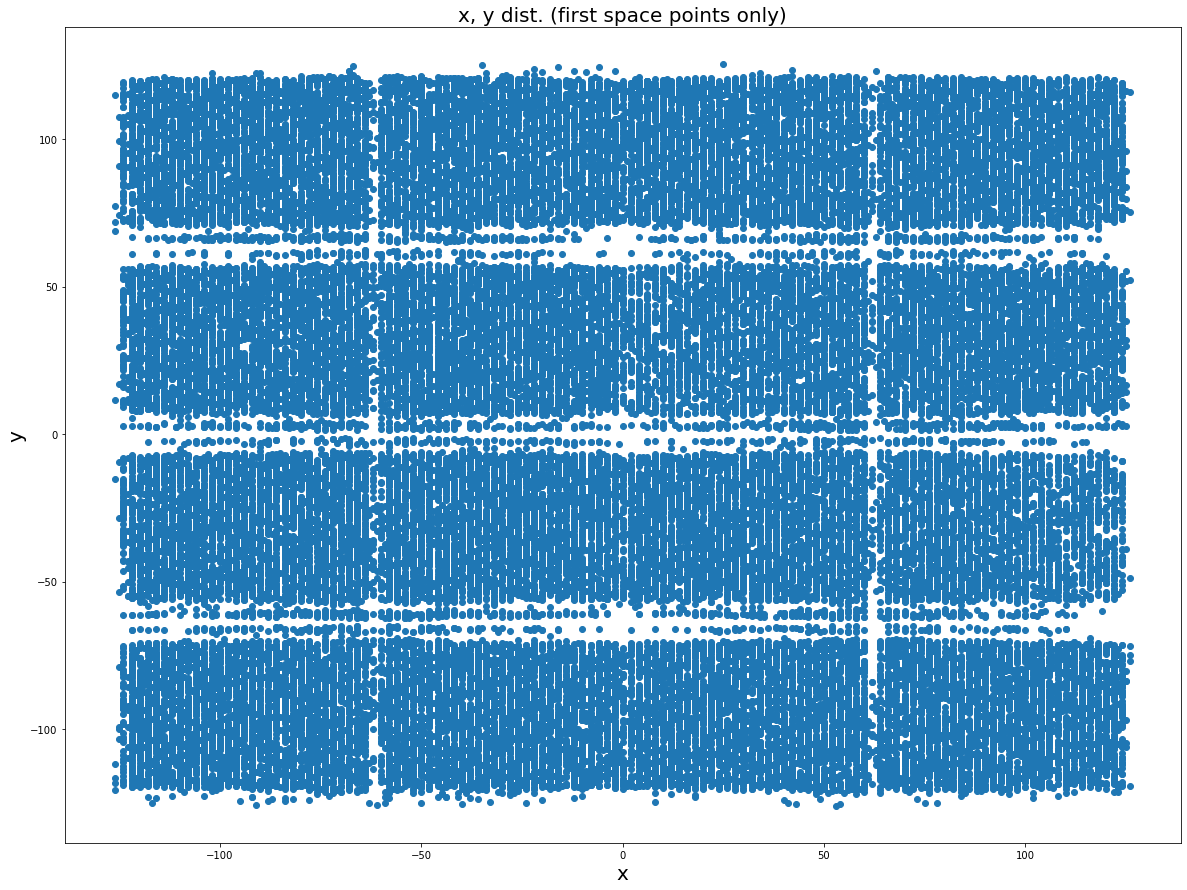

In [19]:
fig = plt.figure(figsize=(20,15))

plt.scatter(x_FIRST,y_FIRST)
plt.title("x, y dist. (first space points only)", size=20)
plt.xlabel("x",size=20)
plt.ylabel("y",size=20)

In [20]:
z_2ND = []

for i in range(0,len(z_space_points[0])):
    if len(z_space_points[:,i][0]) == 3:
        z_2ND.append(z_space_points[:,i][0][1])
    

In [22]:
z_3RD = []

for i in range(0,len(z_space_points[0])):
    if len(z_space_points[:,i][0]) == 3:
        z_3RD.append(z_space_points[:,i][0][2])

In [47]:
x_axis = np.arange(1,len(z_FIRST)+1)

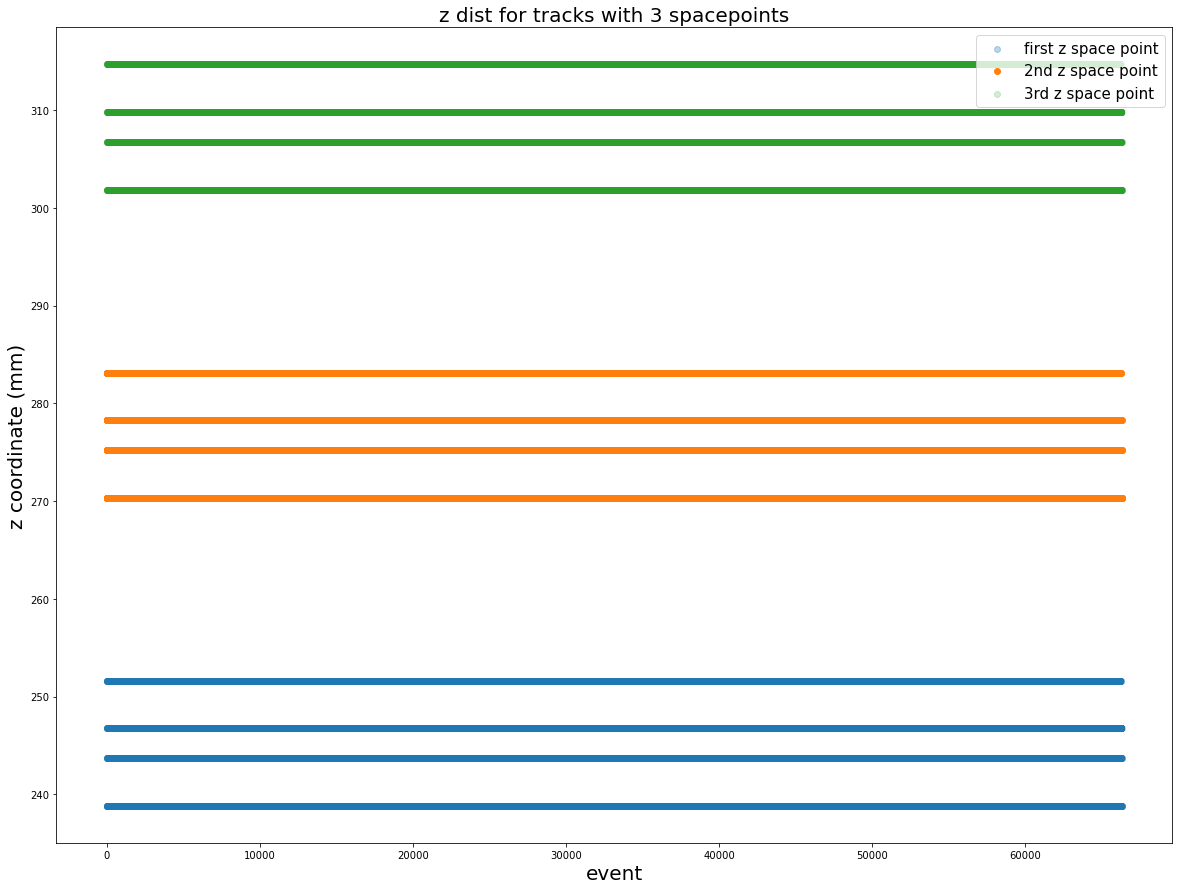

In [66]:
fig = plt.figure(figsize=(20,15))
ax = plt.subplot(1, 1, 1)
ax.scatter(x_axis, z_FIRST,label='first z space point',alpha=0.3)
ax.scatter(x_axis, z_2ND, label = '2nd z space point')
ax.scatter(x_axis, z_3RD, label = "3rd z space point",alpha=0.2)
ax.set_title("z dist for tracks with 3 spacepoints",size=20)
ax.set_xlabel("event", size=20)
ax.set_ylabel("z coordinate (mm)",size=20)
ax.legend(fontsize=15)
#file_name = 'report/z_dist_3SP.png'
#plt.savefig(file_name,bbox_inches='tight',facecolor='w')



In [101]:
x_res= np.array(IFT["spfit"]["sp_track_x_residual"])
y_res = np.array(IFT["spfit"]["sp_track_y_residual"])


In [102]:
res_first = x_res[len(x_res[:])!=0]

In [103]:
res_x_fist = []

for i in range(0,len(res_first[0])):
    if len(res_first[:,i][0]) == 3:
        res_x_fist.append(res_first[:,i][0][0])

In [105]:
res_first2 = y_res[len(y_res[:])!=0]

In [106]:
res_y_fist = []

for i in range(0,len(res_first2[0])):
    if len(res_first2[:,i][0]) == 3:
        res_y_fist.append(res_first2[:,i][0][0])

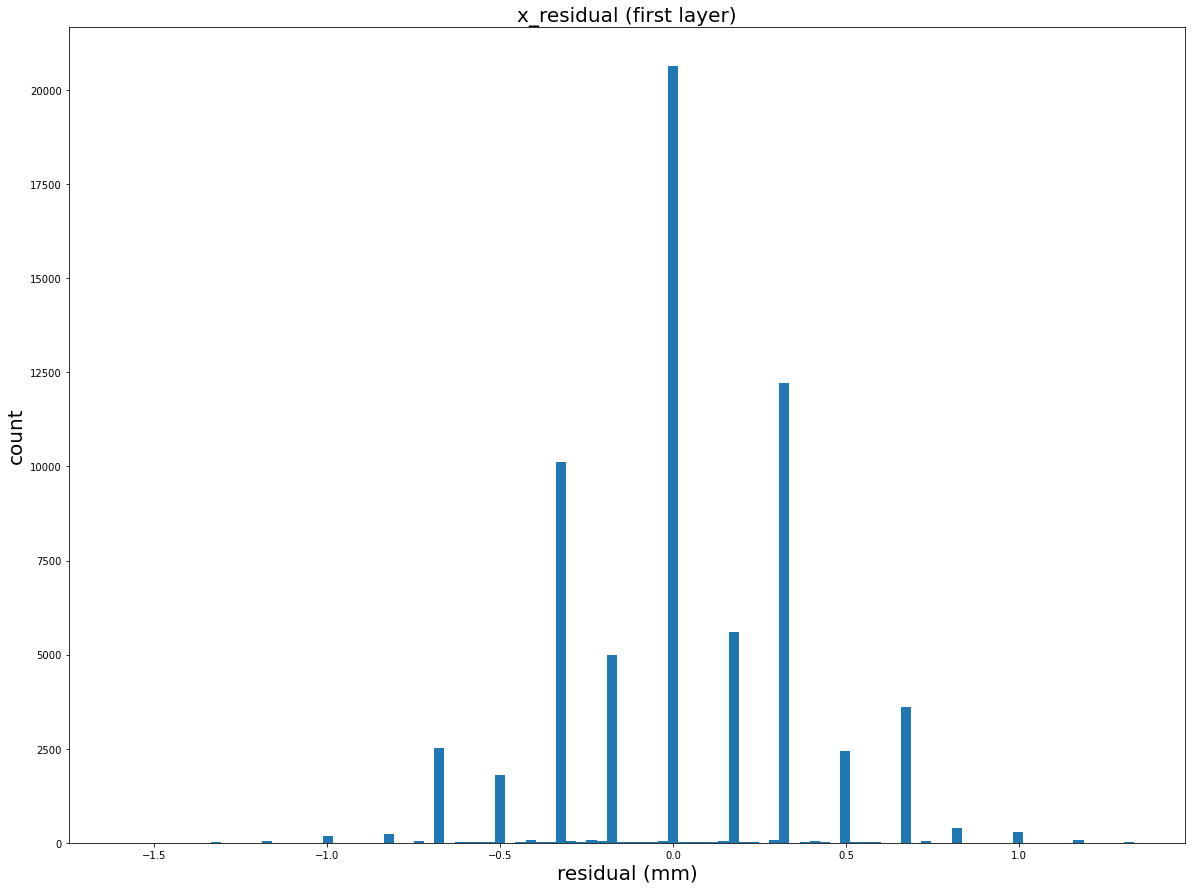

In [118]:
fig = plt.figure(figsize=(20,15))
plt.hist(res_x_fist,bins=100)
plt.title("x_residual (first layer)", size=20)
plt.ylabel("count",size=20)
plt.xlabel("residual (mm)", size=20)
file_name = 'report/x_residual.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

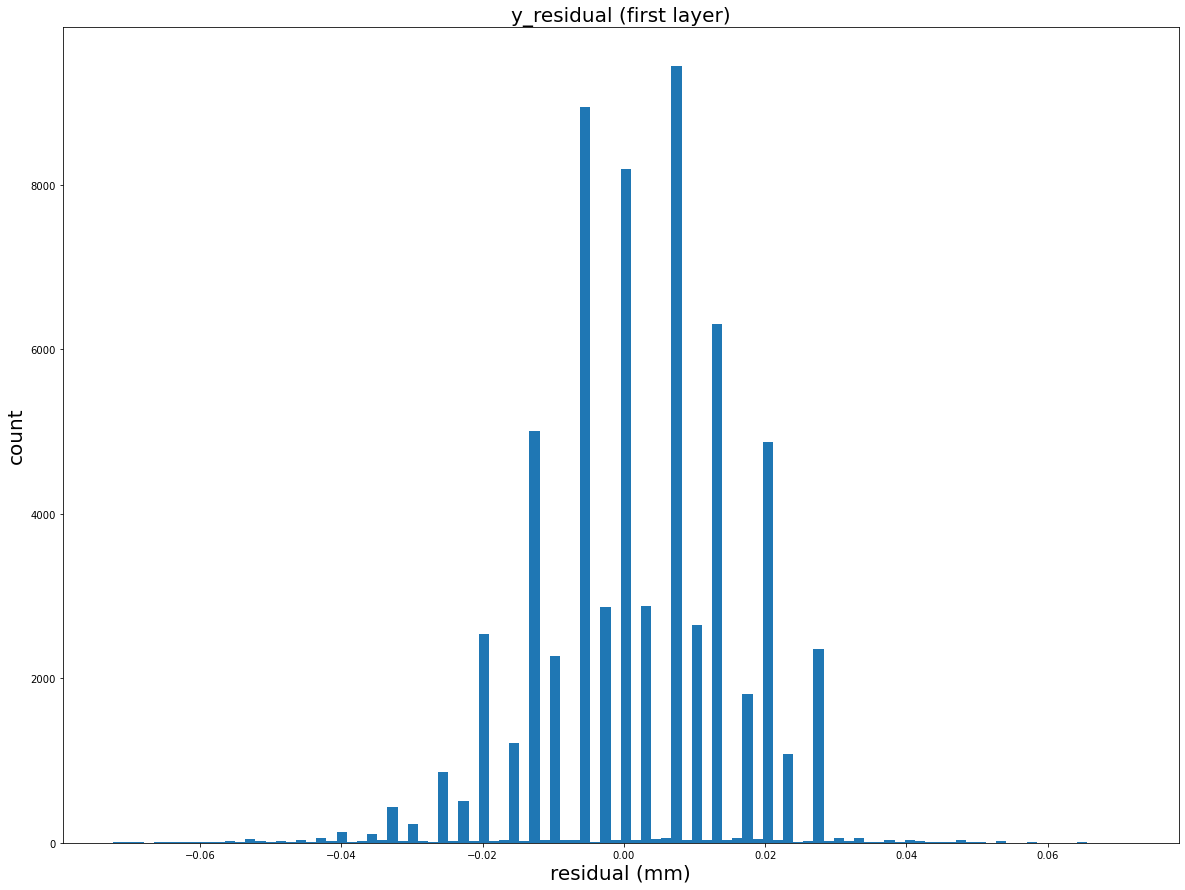

In [117]:
fig = plt.figure(figsize=(20,15))
plt.hist(res_y_fist,bins=100)
plt.title("y_residual (first layer)", size=20)
plt.ylabel("count",size=20)
plt.xlabel("residual (mm)", size=20)
file_name = 'report/y_residual.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

In [132]:
mean = sum(res_x_fist) / len(res_x_fist)
variance = sum([((x - mean) ** 2) for x in res_x_fist]) / len(res_x_fist)
res = variance ** 0.5

In [133]:
print(mean, variance, res)

0.03164366882037804 0.1188485382570661 0.34474416348513587


In [134]:
mean = sum(res_y_fist) / len(res_y_fist)
variance = sum([((x - mean) ** 2) for x in res_y_fist]) / len(res_y_fist)
res = variance ** 0.5

In [135]:
print(mean, variance, res)

0.0020130347079263216 0.0001978733846323157 0.01406674747879963
